# College Prediction Model
**In this notebook we will be attempting to create a machine learning model that predicts acceptance or rejection into one of the top 15 universities in the United States**

Importing relevant libraries and then getting a glimpse of the data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data = pd.read_csv('college_results_scrape.csv', encoding='cp1252')

In [3]:
data.head()

,Decision,SAT,ACT,Subject_tests,GPA,Rank,Gender,Ethnicity,Income_Bracket,School_Type
0,Decision: Deferred,SAT I (breakdown): 760R 800M,ACT (breakdown): 30E 34S 34R 34M,SAT II: 760 Chem,GPA (out of 4.0): n/a,Top 10%,NaN,NaN,NaN,NaN
1,Decision: DeferredObjective:,SAT I (breakdown): N/A,"ACT (breakdown): 35 C (35 E, 33 M, 35 R, 36 S)","SAT II: 800 Math II, 740 Chemistry, 720 World ...",GPA (out of 4.0): 4.0,N/A,F,South asian,Income Bracket: 150k+,Public
2,Decision: Accepted,"SAT I (breakdown): 800 Math, 760 Reading, 6/6/...",NaN,"SAT II: 780 Math II (sophomore year), 800 Phys...",GPA (out of 4.0): 4.0,Top 10%,Female,White,Income Bracket: Upper Middle Class,Public
3,Decision: Deferred,SAT I (breakdown): 1530 (740 EBRW 790 Math),NaN,"SAT II: 720 Chemistry, 720 Math I",GPA (out of 4.0): 4.0,Top 10%,Male,White,Income Bracket: >$150k,Public
4,Decision: Deferred,"SAT I (breakdown): 1580 (Math 800, Reading 780)",NaN,"SAT II: 800 Math, 800 Physics",GPA (out of 4.0): 4.0,NaN,Male,N,Income Bracket: Too much,"Large, competitive, public"


## Data Preprocessing- Cleaning Stage

**Decision Column Cleaning**

Here we are attempting to remove the "Decision" before each result in the Decision column. We will also be unifying all the results to either Accepted or Rejected. For this project we will be considering deferrals and waitlists as rejections.

In [4]:
decision = data.loc[:, 'Decision']
#Cleaning the Decision column
for row in range(len(decision)):
    #We will consider deferrals and waitlists as rejections
    if decision[row].find("Deferred") != -1 or decision[row].find("DEFERRAL") != -1:
        decision[row] = decision[row].replace(decision[row],'Rejected')
        
    if decision[row].find('Wait') != -1 or decision[row].find('wait') != -1:
        decision[row] = decision[row].replace(decision[row],'Rejected')
    
    if decision[row].find('Reject') != -1:
        decision[row] = decision[row].replace(decision[row],'Rejected')
          
    if decision[row].find("Accepted") != -1 or decision[row].find("ACCEPTED") != -1 or decision[row].find("AdMITted") != -1:
        decision[row] = decision[row].replace(decision[row] ,'Accepted')


**SAT Column Cleaning**

Here we are trying to remove the extraneous text in each row under the SAT column

In [5]:
#Removing extra text and just grabbing SAT score
import re
SAT = data.loc[:, 'SAT']
SAT = SAT.astype(str)
regex = "\d{4}"
for row in range(len(SAT)):
    match= re.findall(regex, SAT[row])
    match = "".join(match)
    if len(match) == 4:
        SAT[row] = SAT[row].replace(SAT[row], match)
        

In [6]:
#Combining data that is given in SAT subscores
rege = "\d{3}"
for row in range(len(SAT)):
    tot = re.findall(rege, SAT[row])
    tot = "".join(tot)
    if len(tot) == 6:
        tot = int(tot[0:3]) + int(tot[3:6])
        tot = str(tot)
        SAT[row] = SAT[row].replace(SAT[row], tot)

In [7]:
# Converting all nan values in the SAT column to 0
for row in range(len(SAT)):
    if SAT[row].find("SAT I") != -1 or SAT[row].find("nan") != -1:
        SAT[row] = SAT[row].replace(SAT[row], '0')

In [8]:
data['SAT'] = SAT

**ACT Column Cleaning**

In [9]:
#Create dictionary to map ACT scores to SAT scores
act_to_sat = {'36': '1600', '35': '1540', '34':'1500', '33': '1460', '32': '1430', '31': '1400', '30': '1370',
              '29': '1340', '28': '1310', '27': '1280', '26': '1240', '25': '1210', '24': '1180', '23': '1140',
              '22': '1110', '21' : '1080', '20':'1040', '0': '0', 'nan': '0'}

In [10]:
ACT = data.loc[:, 'ACT']
ACT = ACT.astype(str)
digit = "\d{2}"
#Extracting composite scores
for row in range(len(ACT)):
    total = re.findall(digit, ACT[row])
    total = "".join(total)
    if len(total) == 2:        
        ACT[row] = ACT[row].replace(ACT[row], total)

In [11]:
#Averaging subscores to find composite
for row in range(len(ACT)):
    total = re.findall(digit, ACT[row])
    total = "".join(total)
    if len(total) == 8:
        total = int((int(total[0:2]) + int(total[2:4]) + int(total[4:6]) + int(total[6:8]))/4)
        total = str(total)
        ACT[row] = ACT[row].replace(ACT[row], total)

In [12]:
#Averaging subscores to find composite
for row in range(len(ACT)):
    total = re.findall(digit, ACT[row])
    total = "".join(total)
    if len(total) == 10:
        total = int((int(total[0:2]) + int(total[2:4]) + int(total[4:6]) + int(total[6:8]) + int(total[8:10]))/5)
        total = str(total)
        ACT[row] = ACT[row].replace(ACT[row], total)

In [13]:
#Dealing with nan values in ACT column
for row in range(len(ACT)):
    if ACT[row].find("ACT") != -1:
        ACT[row] = ACT[row].replace(ACT[row], '0')
data['ACT'] = ACT

Now I will convert all ACT scores to SAT scores and then merge the columns

In [14]:
for row in range(len(ACT)):
    ACT[row] = ACT[row].replace(ACT[row], act_to_sat[ACT[row]])

In [15]:
data['ACT'] = ACT

In [16]:
for row in range(len(SAT)):
    if int(SAT[row]) > int(ACT[row]):
        pass
    if int(SAT[row]) < int(ACT[row]):
        SAT[row] = ACT[row]
data['SAT'] = SAT

**Subject Test Column Cleaning**

In [17]:
num_tests= ['0'] * 383
Subject_tests = data.loc[:, 'Subject_tests']
Subject_tests = Subject_tests.astype(str)
calc = "\d{3}"
#Removing all text and only leaving scores
for row in range(len(Subject_tests)):
    total = re.findall(calc, Subject_tests[row])
    total = "".join(total)
    Subject_tests[row] = Subject_tests[row].replace(Subject_tests[row], total)
    num_tests[row] = str(len(total)/3)
num_tests_col = pd.Series(num_tests)

#Creating a new column to keep track of the number of subject tests taken
data['number_of_subject_tests'] = num_tests_col

In [18]:
for row in range(len(Subject_tests)):
    length = len(Subject_tests[row])
    #Averaging the scores depending on the number of tests taken
    if length == 6:
        dat = Subject_tests[row]
        total = str(int(dat[0:3]) + int(dat[3:6]))
        Subject_tests[row] = Subject_tests[row].replace(Subject_tests[row], str(int(total)/(length/3)))
    if length == 9:
        dat = Subject_tests[row]
        total = str(int(dat[0:3]) + int(dat[3:6]) + int(dat[6:9]))
        Subject_tests[row] = Subject_tests[row].replace(Subject_tests[row], str(int(total)/(length/3)))
    if length == 12:
        dat = Subject_tests[row]
        total = str(int(dat[0:3]) + int(dat[3:6]) + int(dat[6:9]) + int(dat[9:12]))
        Subject_tests[row] = Subject_tests[row].replace(Subject_tests[row], str(int(total)/(length/3)))
    if length == 15:
        dat = Subject_tests[row]
        total = str(int(dat[0:3]) + int(dat[3:6]) + int(dat[6:9]) + int(dat[9:12]) + int(dat[12:15]))
        Subject_tests[row] = Subject_tests[row].replace(Subject_tests[row], str(int(total)/(length/3)))

In [19]:
data['Subject_tests'] = Subject_tests

**GPA Column Cleaning**

In [20]:
GPA = data.loc[:, 'GPA']
GPA = GPA.astype(str)
for row in range(len(GPA)):
    GPA[row] = GPA[row].replace("GPA (out of 4.0):", "")
    temp = re.findall('\d*\.?\d+', GPA[row])
    temp = "".join(temp)
    GPA[row] = GPA[row].replace(GPA[row], temp)
data['GPA'] = GPA

**Rank Column Cleaning**

In [21]:
Rank = data.loc[:, 'Rank']
Rank = Rank.astype(str)
for row in range (len(Rank)):
    if Rank[row].find('Top 10%') == -1 and Rank[row].find("Not Top 10%") == -1:
        Rank[row] = Rank[row].replace(Rank[row], 'NA')    

In [22]:
data['Rank'] = Rank

**Gender Column Cleaning**

In [23]:
Gender = data.loc[:, 'Gender']
Gender = Gender.astype(str)
for row in range(len(Gender)):
    if Gender[row].find('f') != -1 or Gender[row].find('F') != -1:
        Gender[row] = Gender[row].replace(Gender[row], 'F')

In [24]:
for row in range(len(Gender)):
    if Gender[row].find('m') != -1 or Gender[row].find('M') != -1:
        Gender[row] = Gender[row].replace(Gender[row], 'M')

In [25]:
for row in range(len(Gender)):
    if Gender[row].find('M') == -1 and Gender[row].find('F') == -1:
        Gender[row] = Gender[row].replace(Gender[row], 'NA')

In [26]:
data['Gender'] = Gender

**Ethnicity Column Cleaning**

In [27]:
Ethnicity = data.loc[:, 'Ethnicity']
Ethnicity = Ethnicity.astype(str)
for row in range(len(Ethnicity)):
    if Ethnicity[row].find('exican') != -1 or Ethnicity[row].find('hispanic') != -1 or Ethnicity[row].find('ispanic') != -1 or Ethnicity[row].find('frican') != -1 or Ethnicity[row].find('atin') != -1 or Ethnicity[row].find('ative') != -1:
        Ethnicity[row] = Ethnicity[row].replace(Ethnicity[row], 'Minority')

for row in range(len(Ethnicity)):
    if Ethnicity[row].find('Minority') == -1:
        Ethnicity[row] = Ethnicity[row].replace(Ethnicity[row], 'Not Minority')

data['Ethnicity'] = Ethnicity

**School Type Column Cleaning**

In [28]:
School = data.loc[:, 'School_Type']
School = School.astype(str)
for row in range(len(School)):
    if School[row].find('ublic') != -1 or School[row].find('harter') != -1:
        School[row] = School[row].replace(School[row], 'Public')
for row in range(len(School)):
    if School[row].find('rivate') != -1 or School[row].find('oarding') != -1:
        School[row] = School[row].replace(School[row], 'Private')
for row in range(len(School)):
    if School[row].find('ome') != -1:
        School[row] = School[row].replace(School[row], 'Home')
for row in range(len(School)):
    if School[row].find('Public') == -1 and School[row].find('Private') == -1 and School[row].find('Home') == -1:
        School[row] = School[row].replace(School[row], 'Public')
data['School_Type'] = School

In [29]:
data

,Decision,SAT,ACT,Subject_tests,GPA,Rank,Gender,Ethnicity,Income_Bracket,School_Type,number_of_subject_tests
0,Rejected,1560,1460,760,,Top 10%,NA,Not Minority,NaN,Public,1.0
1,Rejected,1500,1500,745.0,4.0,NA,F,Not Minority,Income Bracket: 150k+,Public,4.0
2,Accepted,1560,0,793.3333333333334,4.0,Top 10%,F,Not Minority,Income Bracket: Upper Middle Class,Public,3.0
3,Rejected,1530,0,720.0,4.0,Top 10%,M,Not Minority,Income Bracket: >$150k,Public,2.0
4,Rejected,1580,0,800.0,4.0,NA,M,Not Minority,Income Bracket: Too much,Public,2.0
...,...,...,...,...,...,...,...,...,...,...,...
378,Accepted,1460,1460,,3.93,Top 10%,F,Not Minority,"Income Bracket: $175,000~",Private,0.0
379,Accepted,1400,1400,,4.0,Top 10%,F,Not Minority,"Income Bracket: 200,000+",Public,0.0
380,Rejected,1500,1500,,3.76,NA,NA,Not Minority,NaN,Public,0.0
381,Accepted,1540,1540,760.0,4.0,NA,M,Not Minority,Income Bracket:,Public,2.0


## Null Values

For the SAT column we will use the mean for missing values

In [30]:
data['SAT'] = pd.to_numeric(data['SAT'])
data['SAT'].replace(0, np.nan, inplace = True)
data['SAT'].replace(300., np.nan, inplace= True)

For the subject tests column we will replace nan values with zero, since the Subject tests are optional in the admissions process.

In [31]:
data['Subject_tests'].replace("", np.nan, inplace = True)
data['Subject_tests'] = pd.to_numeric(data['Subject_tests'])
data['Subject_tests'].replace(np.nan, 0, inplace = True)

For the GPA column we will replace nan values with the mean

In [32]:
data['GPA'].replace('', np.nan, inplace = True)
data['GPA'] = pd.to_numeric(data['GPA'])
data['GPA'].replace(4.33, 4.0, inplace = True)
data['GPA'].replace(4.55, 4.0, inplace = True)

Replacing Nan values in Rank with the mode

In [33]:
data['Rank'].replace(" Not Top 10%", 'Not Top 10%', inplace = True)
data['Rank'].replace("NA", 'Top 10%', inplace = True)

Making # of subject tests cell to numeric

In [34]:
data['number_of_subject_tests'] = pd.to_numeric(data['number_of_subject_tests'])

Changing decision column so that Accepted = 1 and Rejected = 0

In [35]:
data['Decision'].replace("Accepted", 1, inplace = True)
data['Decision'].replace("Rejected", 0, inplace = True)

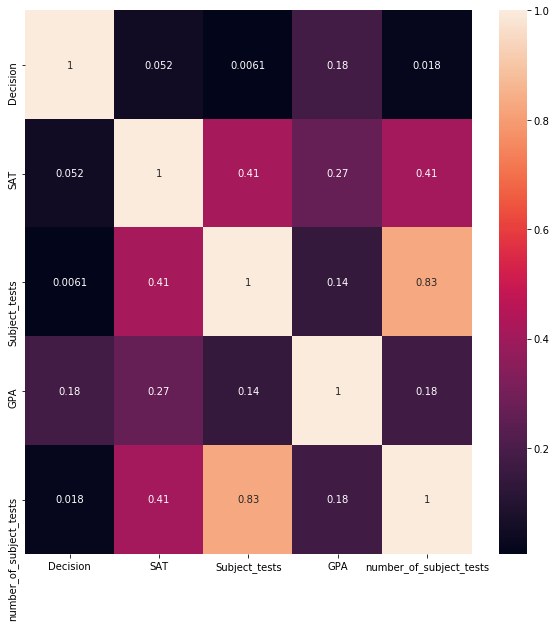

In [37]:
import matplotlib.pyplot as plt
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize= (10,10))
g = sns.heatmap(data[top_corr_features].corr(), annot = True)

## Feature Engineering and Machine Learning

In [38]:
#Dependent variable
y = data.Decision
#Independent variable
X = data
X.drop(columns = ['ACT', 'Income_Bracket', 'Decision'], inplace = True)

In [39]:
from sklearn.model_selection import train_test_split
# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [40]:
#Pipeline: Target encoding the categorical variables and numerical variables
numerical_cols = ['SAT', 'GPA','Subject_tests','number_of_subject_tests']
categorical_cols = ['Rank', 'Gender', 'Ethnicity', 'School_Type']

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


model = XGBClassifier(n_estimators = 100, learning_rate =0.05)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

# Preprocessing of training data, fit model 
clf.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = clf.predict(X_valid)

#Getting accuracy of model along with confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(preds,y_valid)
print(cm)
acc_score= accuracy_score(preds,y_valid)
print(acc_score)

[[25  8]
 [22 22]]
0.6103896103896104


In [45]:
#Testing model with random input
new = [[1540,0,3.85,'Top 10%','M','Not Minority','Public',0]]
test = pd.DataFrame(new, columns = ['SAT', 'Subject_tests', 'GPA', 'Rank', 'Gender', 'Ethnicity', 'School_Type', 'number_of_subject_tests'])
new = clf.predict(test)
print(new)

[0]
